In [1]:
import numpy as np  
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)


In [2]:
data  = pd.read_csv('data.csv')
df = pd.DataFrame(data)
print("data",df.head(3))
print("column_data",df.columns)
# print("dataset_describtion",data.describe)

data        Date      Location              MinTemp              MaxTemp             Rainfall          Evaporation             Sunshine WindGustDir        WindGustSpeed WindDir9am WindDir3pm         WindSpeed9am         WindSpeed3pm          Humidity9am          Humidity3pm          Pressure9am          Pressure3pm             Cloud9am             Cloud3pm              Temp9am              Temp3pm RainToday RainTomorrow
0  07/02/14  CoffsHarbour                17.70                25.90                 2.20                 1.60                  NaN         NNE                31.00         SW        ESE                 7.00                19.00                76.00                66.00             1,017.30             1,016.50                 7.00                 4.00                21.50                24.20       Yes           No
1  23/04/09      Portland                 6.70                22.00                 0.00                 5.40                 0.40         NNE               

In [3]:
print("analysing data at 9am")
data1 = df 
data1 = data1.drop(['Location', 'MinTemp', 'MaxTemp','Evaporation','WindDir3pm','WindSpeed3pm','Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm'],axis=1)
data1 = data1.loc[:,['Date','Temp9am','Pressure9am','Humidity9am','WindSpeed9am','WindDir9am','WindGustSpeed','WindGustDir','Cloud9am','Sunshine','Rainfall','RainToday','RainTomorrow']]
print("before removing null values")
print('rows:',data1.shape[0])
print('columnss:',data1.shape[1])
print("counting null values")
print(data1.isna().sum())
print("__"*100)
print("data cleaning")
data1.memory_usage(index=True, deep=False)
data1['Sunshine'].fillna('0',inplace=True)
print(data1.isna().sum())
print("__"*100)
data1.dropna(inplace=True)
print(data1.isna().sum())
print("__"*100)

print('updated dataframe values')
print("shape",data1.shape)
print("data descrbtion",data1.describe())
print("data information",data1.info())



analysing data at 9am
before removing null values
rows: 100000
columnss: 13
counting null values
Date                 0
Temp9am            620
Pressure9am       9837
Humidity9am       1238
WindSpeed9am       938
WindDir9am        7062
WindGustSpeed     6540
WindGustDir       6581
Cloud9am         37628
Sunshine         47482
Rainfall           970
RainToday          970
RainTomorrow         0
dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________________________
data cleaning
Date                 0
Temp9am            620
Pressure9am       9837
Humidity9am       1238
WindSpeed9am       938
WindDir9am        7062
WindGustSpeed     6540
WindGustDir       6581
Cloud9am         37628
Sunshine             0
Rainfall           970
RainToday          970
RainTomorrow         0
dtype: int64
________________________________________________________________

In [4]:
print("cleaned and re-oredered dataset:")

convert_dict = {'Sunshine': float}
data1 = data1.astype(convert_dict)
print(data1.head(10))

print(data1.corr())

cleaned and re-oredered dataset:
        Date              Temp9am          Pressure9am          Humidity9am         WindSpeed9am WindDir9am        WindGustSpeed WindGustDir             Cloud9am             Sunshine             Rainfall RainToday RainTomorrow
0   07/02/14                21.50             1,017.30                76.00                 7.00         SW                31.00         NNE                 7.00                 0.00                 2.20       Yes           No
1   23/04/09                14.00             1,014.00                65.00                13.00         NE                44.00         NNE                 7.00                 0.40                 0.00        No          Yes
2   08/11/15                12.80             1,022.50                71.00                 7.00         SE                20.00         WSW                 2.00                10.90                 0.00        No           No
4   30/07/13                21.70             1,016.80     

C:\Users\YK\AppData\Local\Temp\ipykernel_10360\1188903070.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data1.corr())


In [5]:

print(data1['WindDir9am'].unique())
print(data1['WindGustDir'].unique())
print(data1['RainToday'].unique())
print(data1['RainTomorrow'].unique())



['SW' 'NE' 'SE' 'SSW' 'N' 'S' 'NNE' 'SSE' 'ENE' 'NNW' 'ESE' 'WSW' 'W'
 'WNW' 'E' 'NW']
['NNE' 'WSW' 'ENE' 'E' 'SW' 'N' 'SSE' 'SSW' 'W' 'S' 'NW' 'NE' 'ESE' 'NNW'
 'SE' 'WNW']
['Yes' 'No']
['No' 'Yes']


In [6]:

from sklearn import preprocessing 
# using label_encoders in encode object and string values
la = data1['WindDir9am']
la1 = data1['WindGustDir']
today = data1['RainToday']
tomorrow = data1['RainTomorrow']


le = preprocessing.LabelEncoder()
le.fit(data1['WindDir9am'])
data1['WindDir9am'] = le.transform(data1['WindDir9am'])
print(data1['WindDir9am'].unique())

le1 = preprocessing.LabelEncoder()
le1.fit(data1['WindGustDir'])
data1['WindGustDir'] = le1.transform(data1['WindGustDir'])
print(data1['WindGustDir'].unique())

le2 = preprocessing.LabelEncoder()
le2.fit(data1['RainToday'])
data1['RainToday'] = le2.transform(data1['RainToday'])
print(data1['RainToday'].unique())

le3 = preprocessing.LabelEncoder()
le3.fit(data1['RainTomorrow'])
data1['RainTomorrow'] = le3.transform(data1['RainTomorrow'])
print(data1['RainTomorrow'].unique())


[12  4  9 11  3  8  5 10  1  6  2 15 13 14  0  7]
[ 5 15  1  0 12  3 10 11 13  8  7  4  2  6  9 14]
[1 0]
[0 1]


In [7]:
label = {"winddir_data":['SW','NE','SE','SSW','N','S','NNE','SSE','ENE','NNW','ESE','WSW','W','WNW','E','NW'],
         "winddir_encoded":[12,4,9,11,3,8,5,10,1,6,2,15,13,14,0,7],
         "windgust_data":['NNE','WSW','ENE','E','SW','N','SSE','SSW','W','S','NW','NE','ESE','NNW','SE','WNW'],
         "windgust_encoded":[5,15,1,0,12,3,10,11,13,8,7,4,2,6,9,14]
         }

pd.DataFrame(label)

,winddir_data,winddir_encoded,windgust_data,windgust_encoded
0,SW,12,NNE,5
1,NE,4,WSW,15
2,SE,9,ENE,1
3,SSW,11,E,0
4,N,3,SW,12
5,S,8,N,3
6,NNE,5,SSE,10
7,SSE,10,SSW,11
8,ENE,1,W,13
9,NNW,6,S,8


In [8]:
print(data1.head(10))

        Date              Temp9am          Pressure9am          Humidity9am         WindSpeed9am  WindDir9am        WindGustSpeed  WindGustDir             Cloud9am             Sunshine             Rainfall  RainToday  RainTomorrow
0   07/02/14                21.50             1,017.30                76.00                 7.00          12                31.00            5                 7.00                 0.00                 2.20          1             0
1   23/04/09                14.00             1,014.00                65.00                13.00           4                44.00            5                 7.00                 0.40                 0.00          0             1
2   08/11/15                12.80             1,022.50                71.00                 7.00           9                20.00           15                 2.00                10.90                 0.00          0             0
4   30/07/13                21.70             1,016.80                61.00 

In [9]:
data1.corr()

C:\Users\YK\AppData\Local\Temp\ipykernel_10360\3734675979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,Temp9am,Pressure9am,Humidity9am,WindSpeed9am,WindDir9am,WindGustSpeed,WindGustDir,Cloud9am,Sunshine,Rainfall,RainToday,RainTomorrow
Temp9am,1.00,-0.43,-0.46,0.05,-0.16,0.10,-0.23,-0.15,0.25,0.02,-0.11,-0.03
Pressure9am,-0.43,1.00,0.10,-0.21,-0.03,-0.44,-0.13,-0.14,0.04,-0.18,-0.20,-0.26
Humidity9am,-0.46,0.10,1.00,-0.21,0.17,-0.17,0.10,0.47,-0.40,0.24,0.39,0.28
WindSpeed9am,0.05,-0.21,-0.21,1.00,-0.00,0.61,0.02,0.03,-0.01,0.07,0.09,0.09
WindDir9am,-0.16,-0.03,0.17,-0.00,1.00,0.03,0.43,0.12,-0.10,0.08,0.18,0.03
WindGustSpeed,0.10,-0.44,-0.17,0.61,0.03,1.00,0.13,0.08,-0.04,0.12,0.16,0.24
WindGustDir,-0.23,-0.13,0.10,0.02,0.43,0.13,1.00,0.09,-0.07,0.04,0.15,0.06
Cloud9am,-0.15,-0.14,0.47,0.03,0.12,0.08,0.09,1.00,-0.50,0.20,0.31,0.32
Sunshine,0.25,0.04,-0.40,-0.01,-0.10,-0.04,-0.07,-0.50,1.00,-0.17,-0.25,-0.32
Rainfall,0.02,-0.18,0.24,0.07,0.08,0.12,0.04,0.20,-0.17,1.00,0.49,0.24


<Axes: ylabel='WindDir9am'>

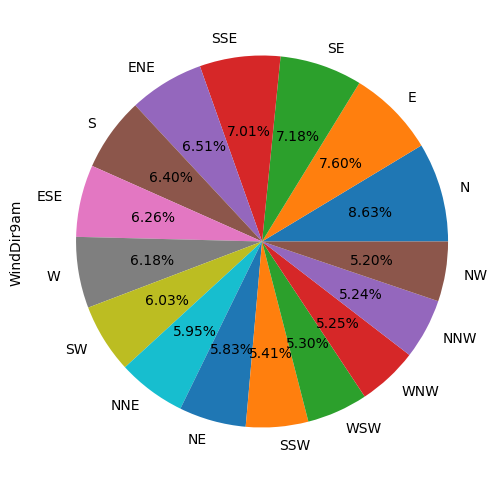

In [10]:
# from the above correlation value we can discover the parameters such as (rainfall,raintoday,raintomorrow) 
# is positively correlated on parameters such as (humidity,windspeed,wind_direction,windgust_speed,windgust_direction,cloud) 

import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))
la.value_counts(normalize=True).plot.pie(autopct='%1.2f%%') 


<Axes: ylabel='WindGustDir'>

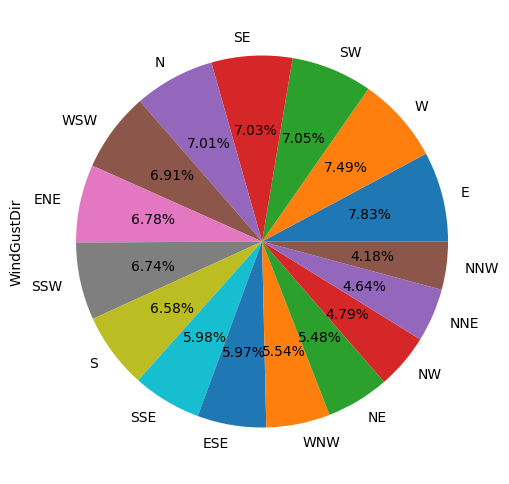

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,10))
la1.value_counts(normalize=True).plot.pie(autopct='%1.2f%%') 

<Axes: title={'center': 'rain_today'}>

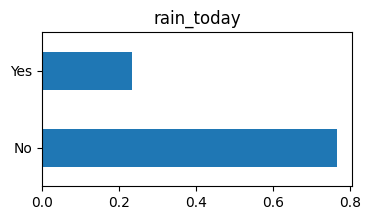

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
plt.title("rain_today")
today.value_counts(normalize=True).plot.barh()

<Axes: title={'center': 'Rain_Tomorrow'}>

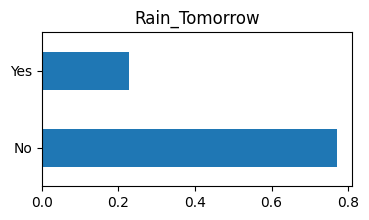

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
plt.title("Rain_Tomorrow")
tomorrow.value_counts(normalize=True).plot.barh()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score   
from sklearn.neural_network import MLPClassifier
df1 = data1.reset_index(drop=True)


df1 = df1.drop(['Date'],axis=1)

x = df1.iloc[:, :-2].values
y = df1.iloc[:, -2].values

x = np.array(x)
y = np.array(y)

print(x[:1])
print(y[:2])
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


[[  21.5 1017.3   76.     7.    12.    31.     5.     7.     0.     2.2]]
[1 0]
(43268, 10)
(10817, 10)
(43268,)
(10817,)


In [15]:
from pycaret.classification import setup
from pycaret.classification import compare_models
grid = setup(data=df1, target=df.columns[-2], html=True,verbose=True)
best = compare_models()
# report the best model
print(best)

,Description,Value
0,Session id,2420
1,Target,RainToday
2,Target type,Binary
3,Original data shape,"(54085, 12)"
4,Transformed data shape,"(54085, 12)"
5,Transformed train set shape,"(37859, 12)"
6,Transformed test set shape,"(16226, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.9999,1.7050
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4430
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4280
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7680
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5440
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5890
rf,Random Forest Classifier,0.9999,1.0000,0.9998,1.0000,0.9999,0.9999,0.9999,0.7460
catboost,CatBoost Classifier,0.9999,1.0000,0.9998,1.0000,0.9999,0.9999,0.9999,6.0380
et,Extra Trees Classifier,0.9900,0.9997,0.9632,0.9939,0.9783,0.9719,0.9721,0.9530
qda,Quadratic Discriminant Analysis,0.9732,1.0000,1.0000,0.8973,0.9458,0.9281,0.9306,0.4360


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2420, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [16]:
from pycaret.classification import tune_model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report
import joblib

# best = tune_model(QuadraticDiscriminantAnalysis(), n_iter=200, choose_better=True)
# # report the best model
# print(best)

qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(x_train, y_train)

# Make predictions on the test data
y_pred = qda.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

import time
training_start = time.perf_counter()
qda.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds1 = qda.predict(x_test)
prediction_end = time.perf_counter()
acc = (preds1 == y_test).sum().astype(float) / len(preds1)*100
qda_train_time = training_end-training_start
qda_prediction_time = prediction_end-prediction_start
print("QuadraticDiscriminantAnalysis:",preds1)
print("QuadraticDiscriminantAnalysis prediction accuracy is: %3.2f" % (acc))
print("Time consumed for training: %4.3f" % (qda_train_time))
print("Time consumed for prediction: %6.5f seconds" % (qda_prediction_time))
joblib.dump(qda,'QuadraticDiscriminantAnalysis.pkl')


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      8218
           1       0.90      1.00      0.95      2599

    accuracy                           0.97     10817
   macro avg       0.95      0.98      0.97     10817
weighted avg       0.98      0.97      0.98     10817

QuadraticDiscriminantAnalysis: [0 0 0 ... 0 0 0]
QuadraticDiscriminantAnalysis prediction accuracy is: 97.47
Time consumed for training: 0.022
Time consumed for prediction: 0.00286 seconds


['QuadraticDiscriminantAnalysis.pkl']

In [17]:
from sklearn import metrics

#_Error_Calculation_
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds1)))


Mean Absolute Error: 0.02533049828972913
Mean Squared Error: 0.02533049828972913
Root Mean Squared Error: 0.1591555788834596


**testing 

In [18]:
x = np.array([[21.5,1017.3,76.,7.,12.,31.,5.,7.,0.,2.2]])
x = x.reshape(1,-1)
p = qda.predict(x)
print(*p)

1


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib
# best = tune_model(ExtraTreesClassifier(), n_iter=200, choose_better=True)
# # report the best model
# print(best)


et = ExtraTreesClassifier()

# Fit the model to the training data
et.fit(x_train, y_train)

# Make predictions on the test data
y_pred = et.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

import time
training_start = time.perf_counter()
et.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds1 = et.predict(x_test)
prediction_end = time.perf_counter()
acc = (preds1 == y_test).sum().astype(float) / len(preds1)*100
et_train_time = training_end-training_start
et_prediction_time = prediction_end-prediction_start
print("Extra_tree_Classifier:",preds1)
print("Extra_tree_Classifier's prediction accuracy is: %3.2f" % (acc))
print("Time consumed for training: %4.3f" % (et_train_time))
print("Time consumed for prediction: %6.5f seconds" % (et_prediction_time))
joblib.dump(et,'ExtraTreesClassifier.pkl')


Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8218
           1       1.00      0.98      0.99      2599

    accuracy                           0.99     10817
   macro avg       1.00      0.99      0.99     10817
weighted avg       0.99      0.99      0.99     10817

Extra_tree_Classifier: [0 0 0 ... 0 0 0]
Extra_tree_Classifier's prediction accuracy is: 99.36
Time consumed for training: 2.961
Time consumed for prediction: 0.19851 seconds


['ExtraTreesClassifier.pkl']

**testing

In [20]:
x = np.array([[21.5,1017.3,76.,7.,12.,31.,5.,7.,0.,2.2]])
x = x.reshape(1,-1)
p = et.predict(x)
print(*p)

from sklearn import metrics

#_Error_Calculation_
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds1)))


1
Mean Absolute Error: 0.006378848109457336
Mean Squared Error: 0.006378848109457336
Root Mean Squared Error: 0.07986769127411494
